In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import warnings
warnings.simplefilter('ignore')
%matplotlib inline  
%config InlineBackend.figure_format = 'retina'

from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### Load Data:

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!curl -L https://bit.ly/33aJCVy -o w5_PM_train.csv
!curl -L https://bit.ly/39N0hzR -o w5_PM_test.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   144  100   144    0     0    421      0 --:--:-- --:--:-- --:--:--   421
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 14.7M  100 14.7M    0     0  3708k      0  0:00:04  0:00:04 --:--:-- 6866k0  2644k      0  0:00:05  0:00:03  0:00:02 5591k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   143  100   143    0     0    423      0 --:--:-- --:--:-- --:--:--   421
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 9527k  100 9527k    0     0  2146k      0  0:00:04  0:00:04 --:--:-- 3073k


In [3]:
df_train = pd.read_csv('w5_PM_train.csv')
df_train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187,0,0


In [4]:
df_test = pd.read_csv('w5_PM_test.csv')
df_test.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,142,0,0
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,0.017607,0.0,0.707107,0.0,0.0,0.113137,0.012799,141,0,0
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,0.032155,0.0,0.577350,0.0,0.0,0.113725,0.021642,140,0,0
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,0.027781,0.0,0.957427,0.0,0.0,0.093095,0.020353,139,0,0
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,0.024080,0.0,1.303840,0.0,0.0,0.080623,0.020672,138,0,0


- 원래 특성 및 추가된 특성 사용하기

In [5]:
# original features
features_orig = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

# original + extracted fetures
features_extend = ['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 'av1', 'av2', 'av3', 'av4', 'av5', 'av6', 'av7', 'av8', 'av9', 'av10', 'av11', 'av12', 'av13', 'av14', 'av15', 'av16', 'av17', 'av18', 'av19', 'av20', 'av21', 'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9', 'sd10', 'sd11', 'sd12', 'sd13', 'sd14', 'sd15', 'sd16', 'sd17', 'sd18', 'sd19', 'sd20', 'sd21']

y_train = df_train['label_bnc']
y_test = df_test['label_bnc']

## 이진 분류
- 특성을 추가하기 전

In [6]:
X_train = df_train[features_orig]
X_test = df_test[features_orig] 

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [8]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12706    58]
 [  162   170]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12764
           1       0.75      0.51      0.61       332

    accuracy                           0.98     13096
   macro avg       0.87      0.75      0.80     13096
weighted avg       0.98      0.98      0.98     13096



In [9]:
def draw_roc(y_test, y_score):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test.values, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

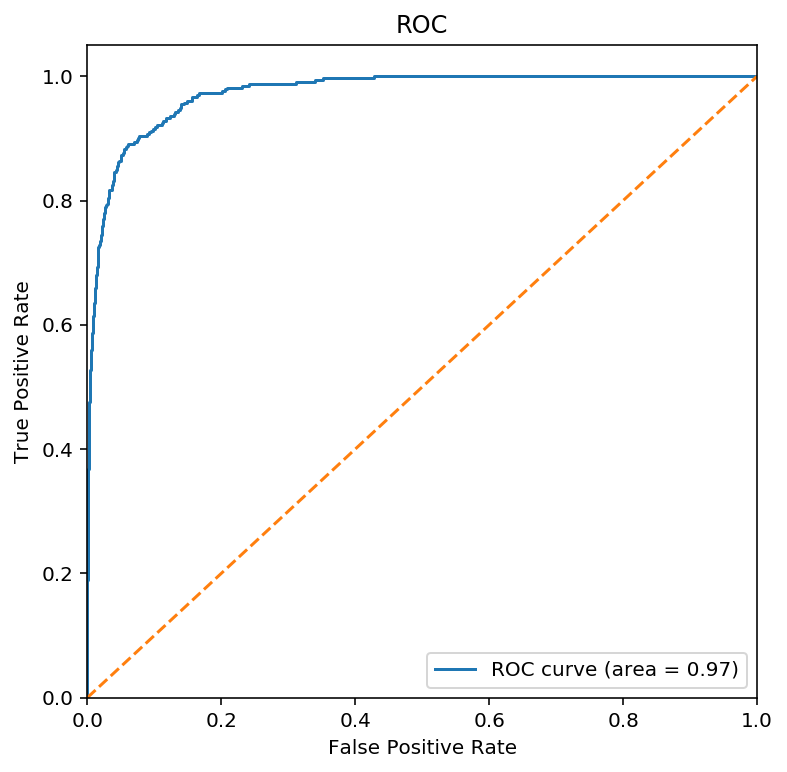

In [10]:
y_score = model.predict_proba(X_test)[:,1]
draw_roc(y_test, y_score)

## 랜덤 포레스트

In [11]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [12]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12721    43]
 [  129   203]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12764
           1       0.83      0.61      0.70       332

    accuracy                           0.99     13096
   macro avg       0.91      0.80      0.85     13096
weighted avg       0.99      0.99      0.99     13096



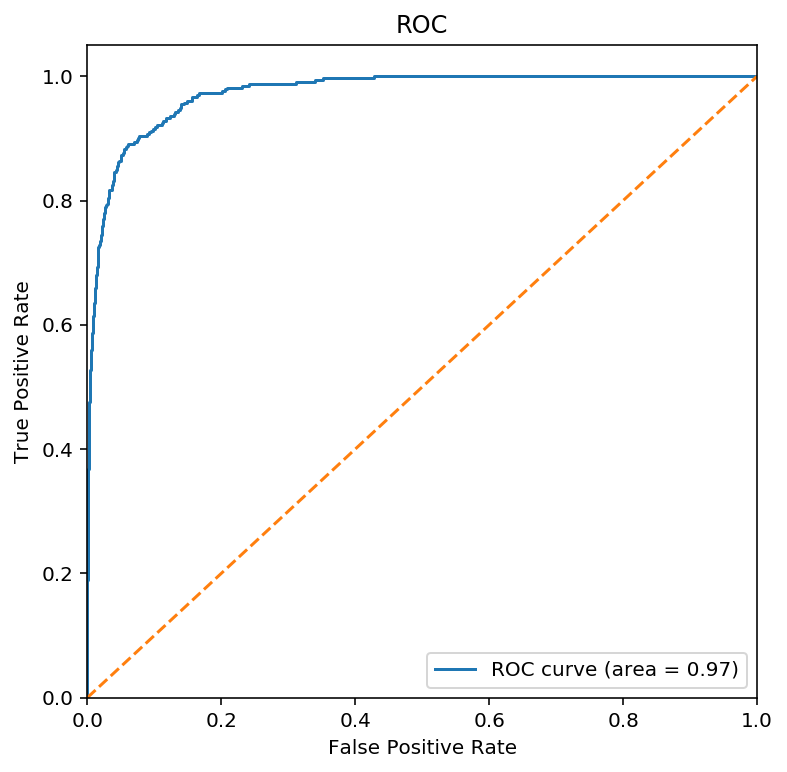

In [13]:
y_score = model.predict_proba(X_test)[:,1]
draw_roc(y_test, y_score)

## 확장된 특성을 사용

In [14]:
X_train = df_train[features_extend]
X_test = df_test[features_extend]

In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12731    33]
 [  148   184]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12764
           1       0.85      0.55      0.67       332

    accuracy                           0.99     13096
   macro avg       0.92      0.78      0.83     13096
weighted avg       0.98      0.99      0.98     13096



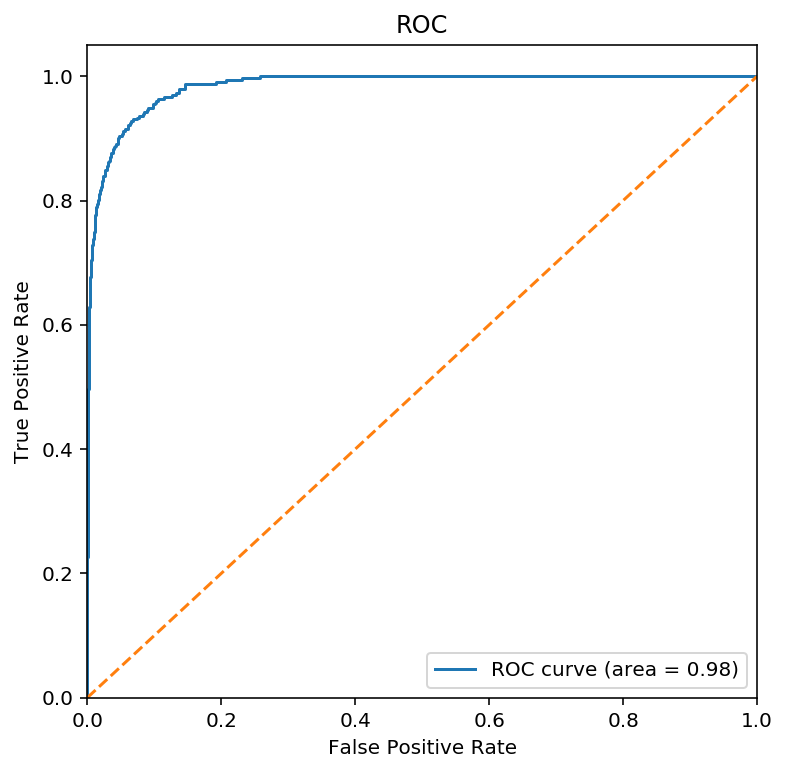

In [17]:
y_score = model.predict_proba(X_test)[:,1]
draw_roc(y_test, y_score)

In [18]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [19]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12721    43]
 [  128   204]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12764
           1       0.83      0.61      0.70       332

    accuracy                           0.99     13096
   macro avg       0.91      0.81      0.85     13096
weighted avg       0.99      0.99      0.99     13096



## 이진 분류 성능 요약

* 로지스틱 회귀 모델은 특성을 추가하면 성능이 좋아진다.
* 랜덤 포레스트는 특성 추가 전후에 같다.